# **Regional Playstyle & Strategic Differences Among Major Professional League of Legends Leagues**


### **Team Members**
- Brian Park (PM)
- Akbar Wibowo  
- Andy Chen
- Drishti Chulani  
- Lorelei Liu
- Suji Kim

##**Overview**

Esports has evolved into a global phenomenon, drawing millions of viewers and players across competitive gaming titles. Among these, *League of Legends (LoL)*—a Multiplayer Online Battle Arena (MOBA) developed by Riot Games in 2009—stands out as one of the most influential and popular esport. In its primary mode, *Summoner’s Rift*, two teams of five players compete to destroy the opponent’s Nexus while managing gold, experience, and map control. Each player assumes a unique role—Top, Jungle, Mid, Bottom (ADC), or Support—selecting from over 170 champions, each with distinct abilities and playstyles. Gameplay involves balancing and building early-game advantages into mid-late game win conditions, where coordination, strategy, and adaptability determine success. This project leverages Leaguepedia data to analyze player performance patterns and identify metrics that contribute to consistent wins and recovery from early disadvantages.

###**Problem Definition**

This project aims to analyze the distinctive playstyles and strategic patterns of major professional League of Legends regions — LCK (Korea), LPL (China), LEC (Europe), and LCS (North America) — using match-level performance data from 2020 to 2024.

Despite being governed by the same game rules, each region has cultivated unique approaches to early-game aggression, objective control, and late-game decision-making. However, with the evolution of patches, player mobility across regions, and the rise of global tournaments, these stylistic boundaries may have shifted or converged over time.

Through detailed statistical analysis, this project seeks to:
  
- Identify **distinct strategic characteristics** and playstyles among the four regions.  
- Examine **how these traits evolve** across seasons and game patches (2020–2024).   
- Quantify **which strategic tendencies** (e.g., early game dominance, scaling focus, or macro control) correlate with **higher win rates**.  
- Highlight **key player behaviors and trends** that define regional identities.  

Ultimately, this project will help surface measurable insights into how playstyles differ regionally and which tactical approaches are most effective in professional League of Legends.

### **Executive Summary**
This project gives an in-depth analysis of League of Legends professional e-sports while excluding the highly technical information on tempo and advanced drafting strategies indigestible for the average stakeholder. Key findings reveal that players can reach long term success in their careers with diverse champion pools. While truly dominant teams are characterized by quick snowballing and tower acquisition, most wins are secured through controlled and efficient macro play. According to the insights highlighted, it is recommended for stakeholders to remove the age-curve bias when considering esports athletes, unlike traditional sports, and invest in teams that focus on controlled, known-risk plays and picks in the regular season, with abilities to play out of their comfort zone in elimination tournaments and playoffs.

### **Data Sources**  
1. **LoL Esports Match Data (OraclesElixir – Riot Games):**  
   - **Link:** [oracleselixir.com/tools/downloads](https://oracleselixir.com/tools/downloads)  
   - Contains detailed match statistics across global leagues from 2020–2024.  
   - **Variables:** League, Year, Date, PlayerName, TeamName, Champion, Position, Damage Per Minute (DPM), Gold Per Minute (GPM), Gold Difference at 10/25 (GD@10/25), CS Difference at 10/25 (CSD@10/25), Result, and more.  
   - **Data Size:** ~145,080 rows, 113.1 MB  

2. **LoL Esports Player Data (Leaguepedia – Webscraped):**  
   - **Link:** [leaguepedia.com](https://lol.fandom.com/wiki/Leaguepedia)  
   - Contains player-level metadata such as in-game names, legal names, birthdates, nationalities, and team history.  
   - **Data Size:** ~800 rows, 41 KB  

These datasets were cleaned and queried using **BigQuery SQL**, where we derived metrics such as win rate, early-game deficits (e.g., `golddiffat10`), and late-game recovery (e.g., `golddiffat25`), enabling region-wise and player-level performance comparisons.




### **Entity Relationship Diagram (ERD)**  
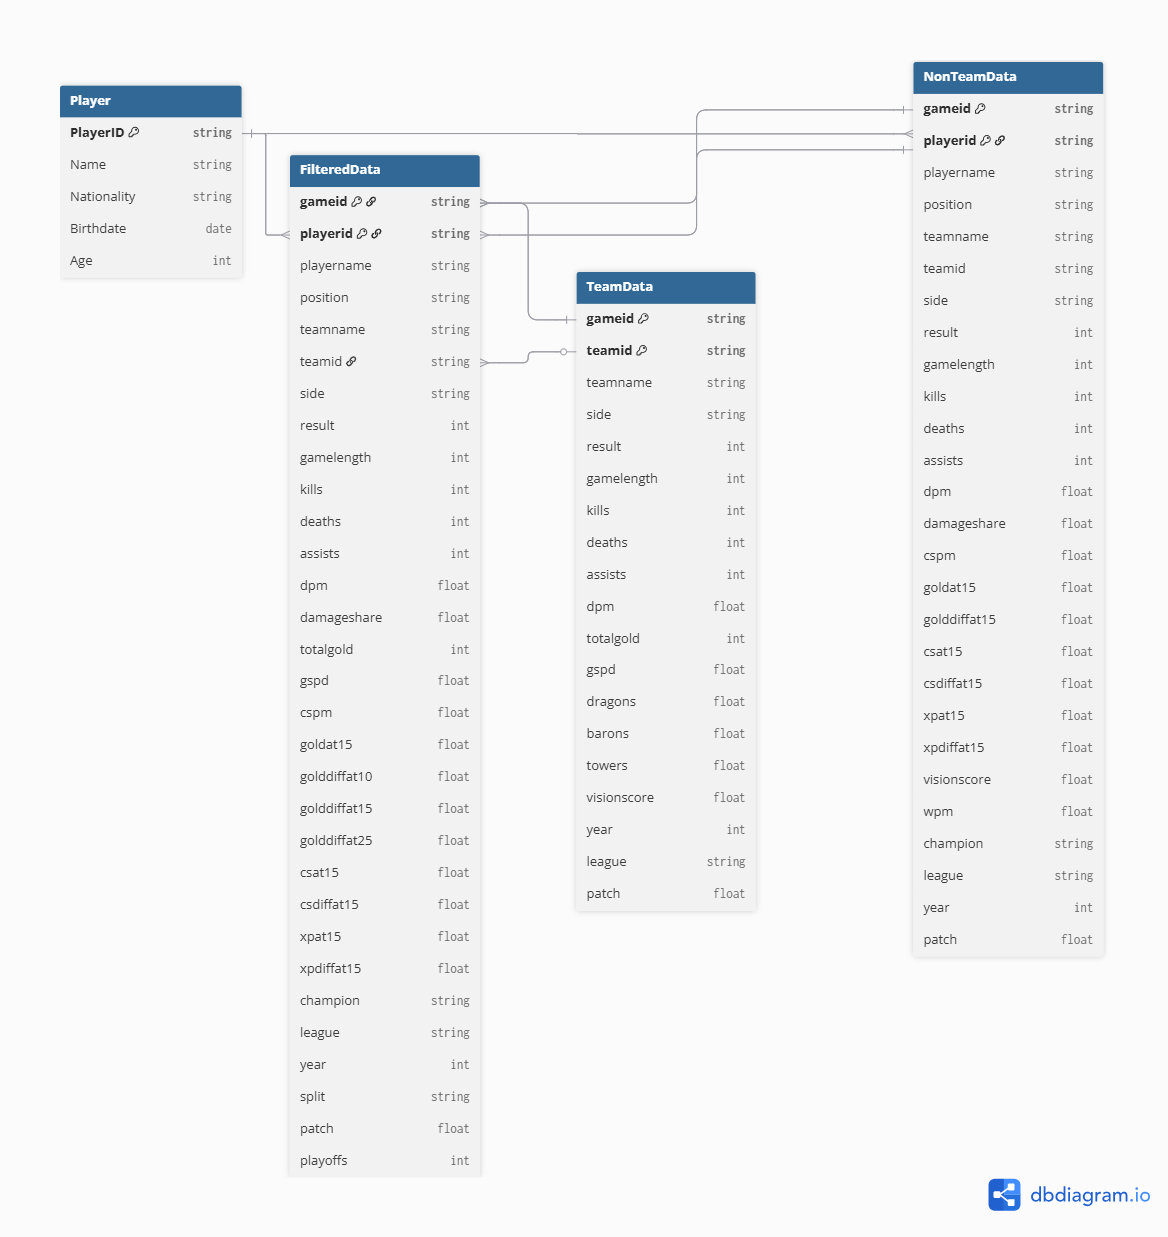

##**Tableau Dashboard**

[Tableau Public Link:](https://public.tableau.com/app/profile/suji.kim4394/viz/Team7_BA775_FinalProject_17652101237440/Dashboard1)


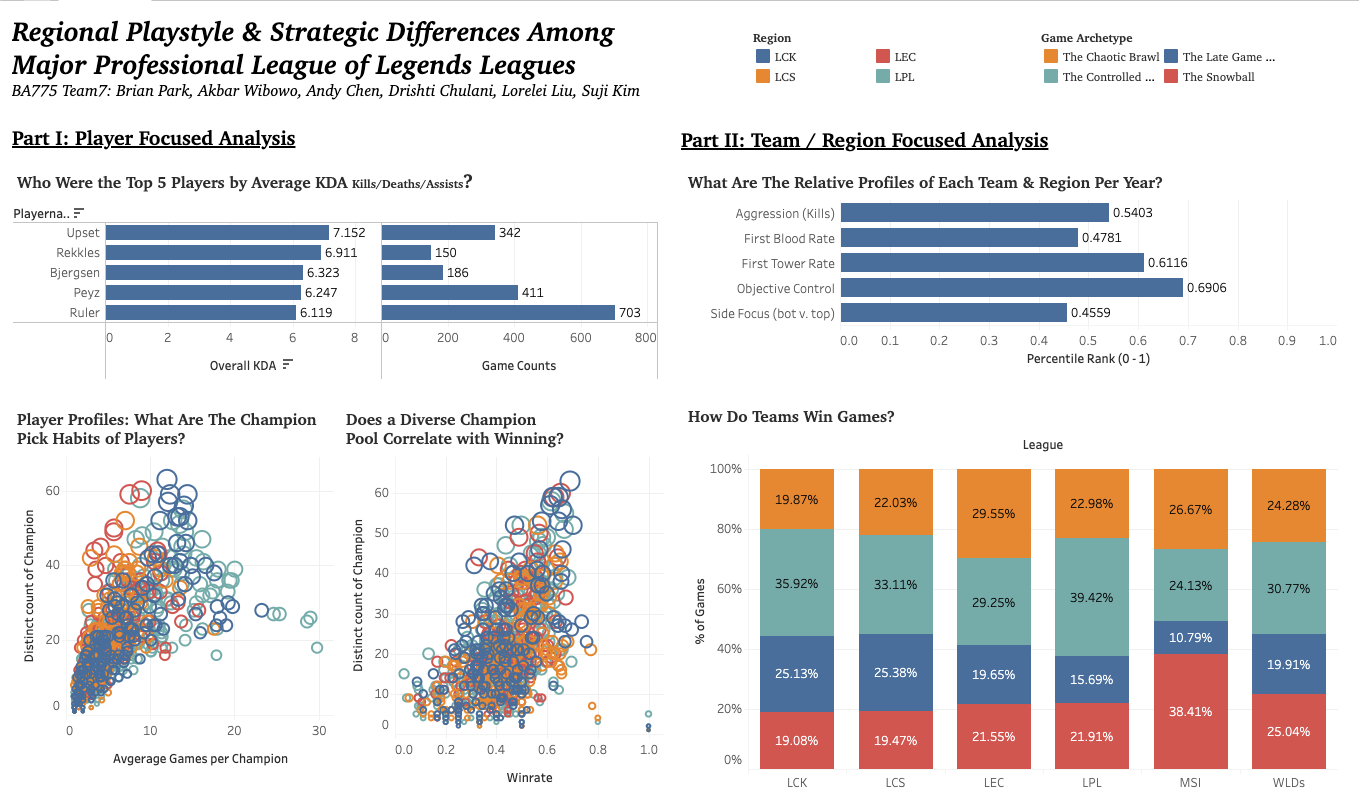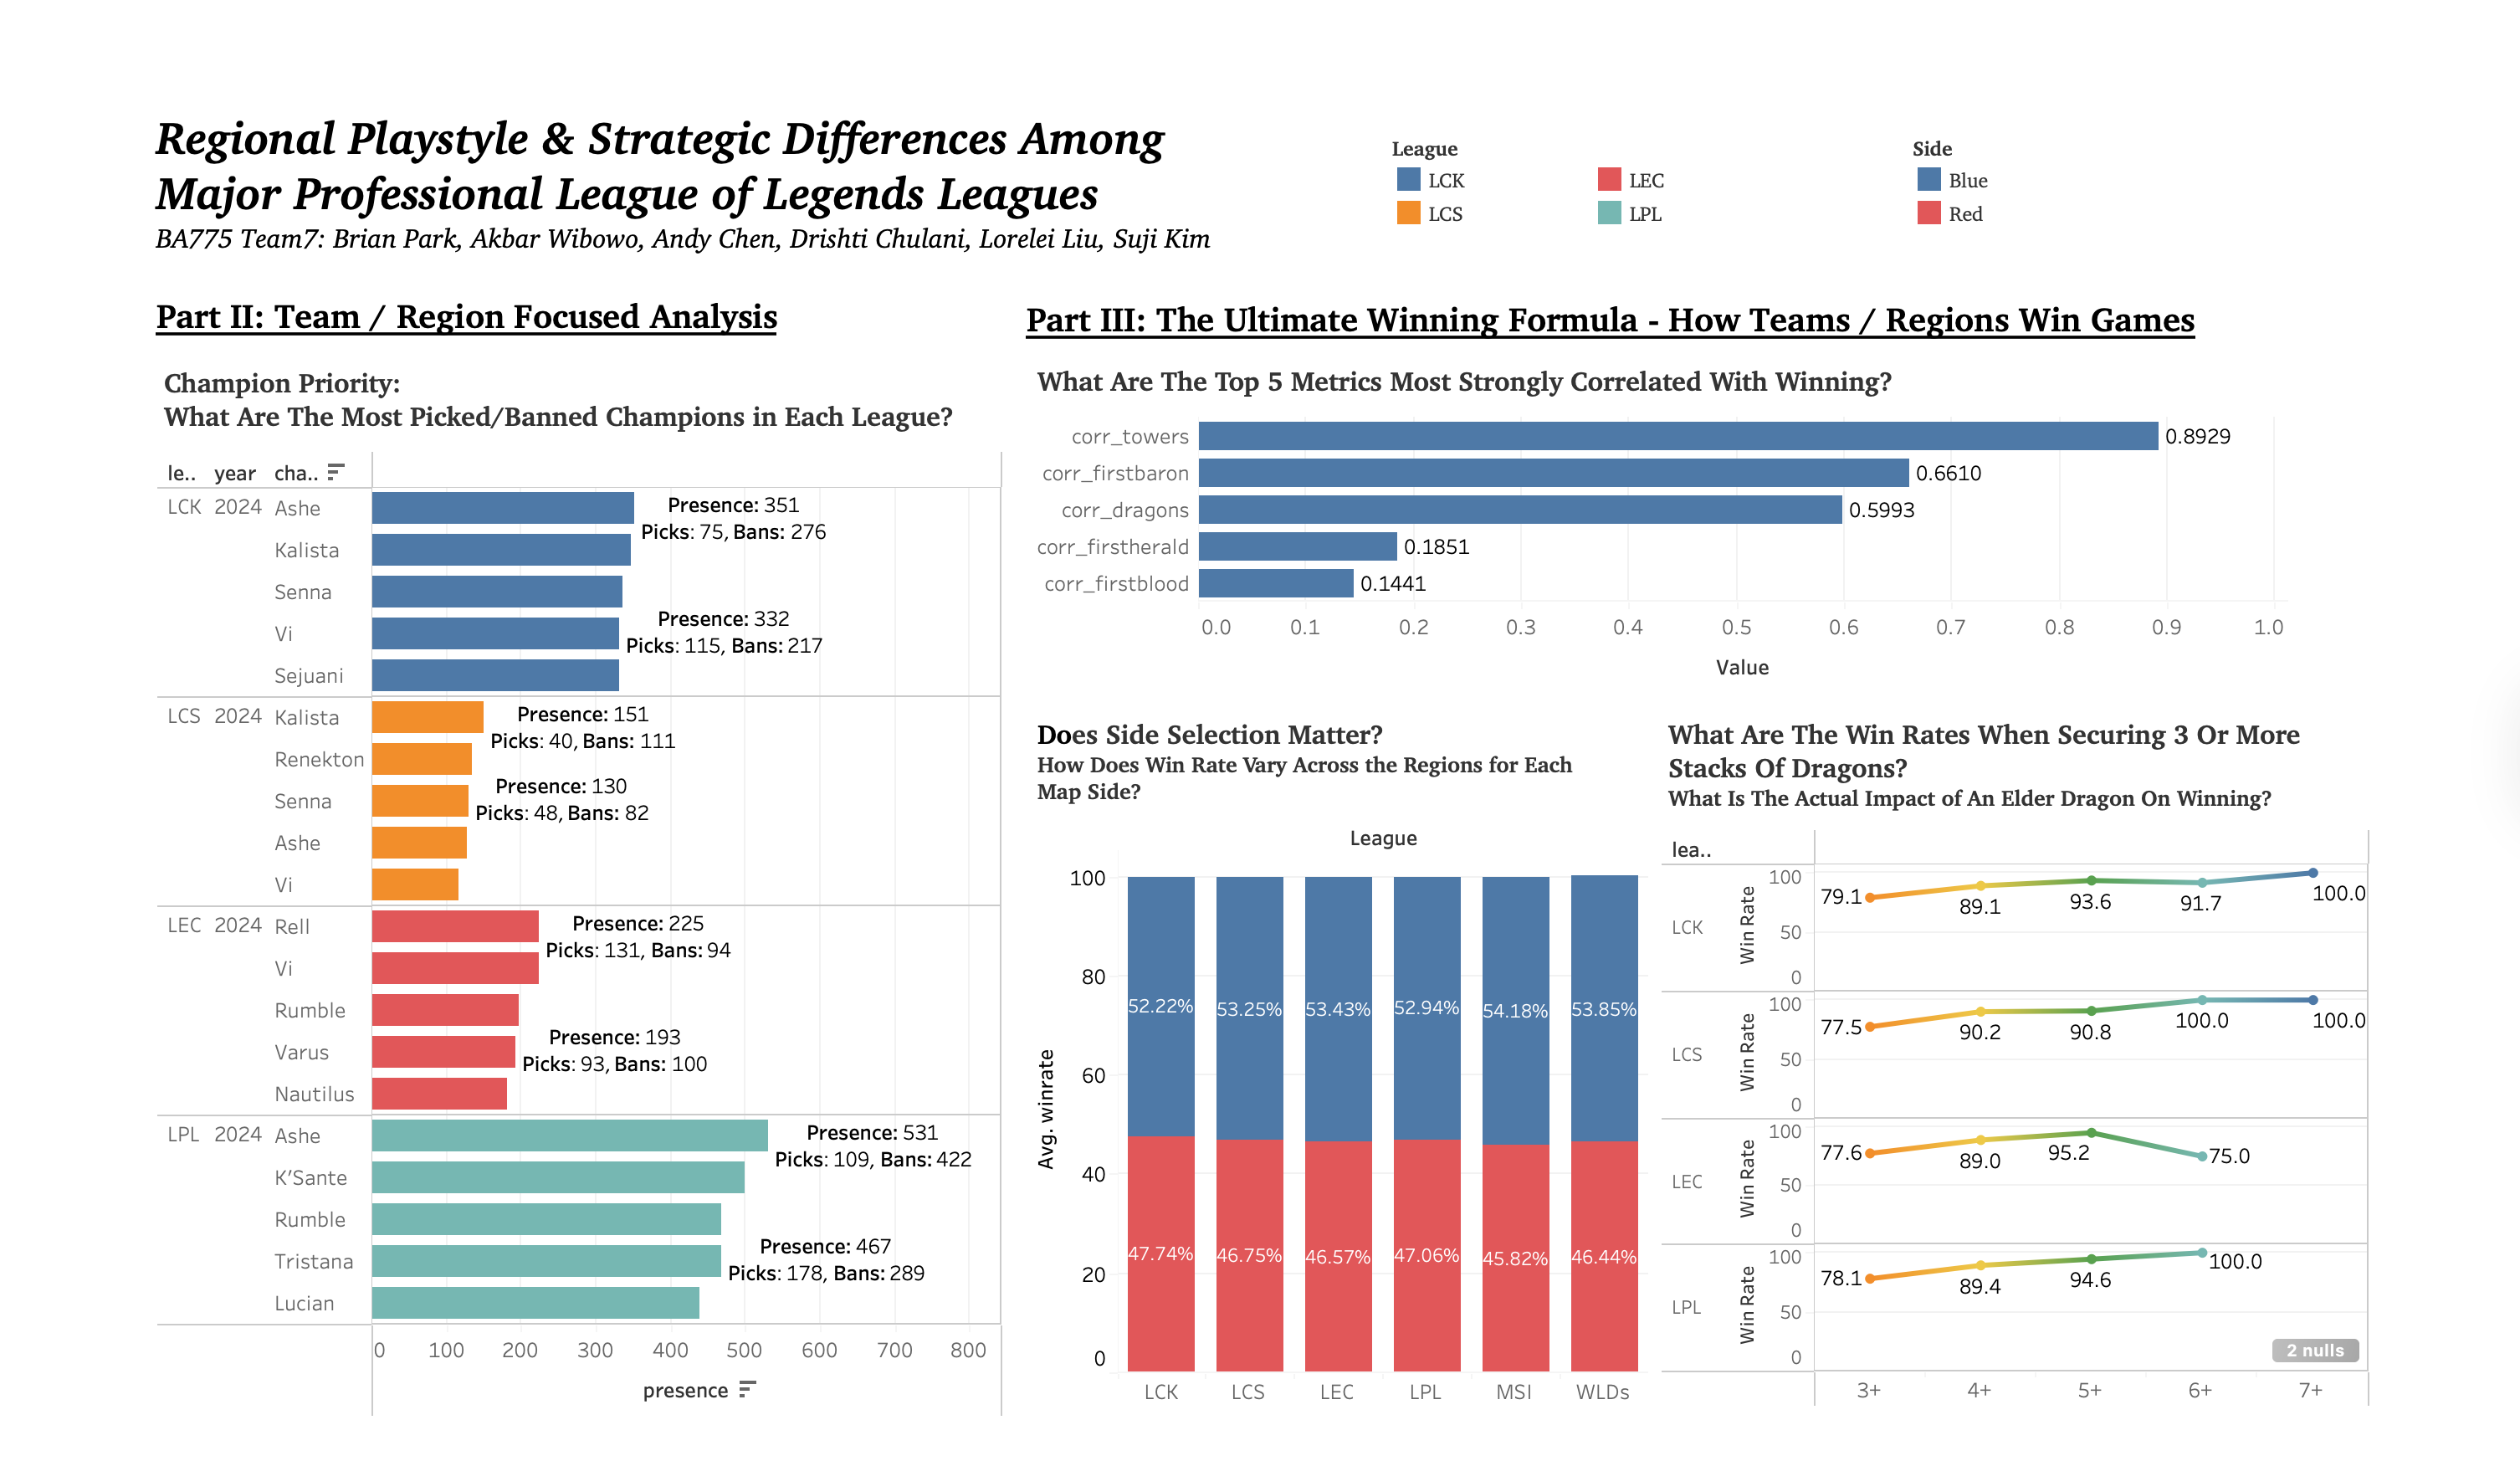

### **Data Cleaning**


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT *
FROM `leaguepedia_data.Player_data`
WHERE Birthdate IS NOT NULL
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=763, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT *
FROM `leaguepedia_data.filtered_data`
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=145080, table_html='<table border="1" class="dataframe table table-striped…

Computation deferred. Computation will process 139.1 MB

In this dataset, we can see **uneven data** in our rows. This is because some rows represent data points for **teams**, showing an aggregated statistic for an entire team of five players. In the same columns, there are also rows representing individual players, that show a much lower individual statistic. We have divided the two sets of data into *'team'* and *'non-team'*.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  CASE
    WHEN position = 'team' THEN 'team'
    ELSE 'non-team'
  END AS team_category,
  COUNT(*) AS count_rows
FROM
  `leaguepedia_data.filtered_data`
GROUP BY
  team_category
ORDER BY
  count_rows DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=2, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
    PlayerID,
    Nationality,
    Birthdate,
    Age,
    -- Creates the clean name by removing (scripts)
    TRIM(REGEXP_REPLACE(Name, r'\s*\(.*\)', '')) AS Cleaned_PlayerName
FROM leaguepedia_data.Player_data;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=800, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type,
  is_nullable,
FROM
  `ba775-fall25-b07.leaguepedia_data.INFORMATION_SCHEMA.COLUMNS`
WHERE
  table_name = 'filtered_data'
ORDER BY ordinal_position;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=164, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 0 Bytes

**2 Tables: 'filtered_data_team' & 'filtered_data_nonteam**:

Since both team and individual player statistics were in one dataset, the dataset featured different columns that were relevant to teams and players. For the sake of memory and data cleanliness, we identified and separated these columns into their respective *team* and *non-team* data tables.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE `ba775-fall25-b07.leaguepedia_data.filtered_data_team` AS
SELECT
  *,
  ROUND(gamelength / 60) AS gametime_minutes
FROM `ba775-fall25-b07.leaguepedia_data.filtered_data`
WHERE playername IS NULL OR playername = ''
;

ALTER TABLE `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
DROP COLUMN IF EXISTS cspm,
DROP COLUMN IF EXISTS minionkills,
DROP COLUMN IF EXISTS `total cs`,
DROP COLUMN IF EXISTS gpr,
DROP COLUMN IF EXISTS earnedgoldshare,
DROP COLUMN IF EXISTS damageshare,
DROP COLUMN IF EXISTS opp_turretplates,
DROP COLUMN IF EXISTS turretplates,
DROP COLUMN IF EXISTS champion,
DROP COLUMN IF EXISTS firstbloodkill,
DROP COLUMN IF EXISTS firstbloodassist,
DROP COLUMN IF EXISTS firstbloodvictim,
DROP COLUMN IF EXISTS `dragons_type unknown_`,
DROP COLUMN IF EXISTS playername,
DROP COLUMN IF EXISTS playerid,
DROP COLUMN IF EXISTS infernals,
DROP COLUMN IF EXISTS mountains,
DROP COLUMN IF EXISTS clouds,
DROP COLUMN IF EXISTS oceans,
DROP COLUMN IF EXISTS hextechs,
DROP COLUMN IF EXISTS chemtechs,
DROP COLUMN IF EXISTS monsterkillsownjungle,
DROP COLUMN IF EXISTS monsterkillsenemyjungle;


-- filtered_data_nonteam
CREATE OR REPLACE TABLE `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam` AS
SELECT
  *,
  ROUND(gamelength / 60) AS gametime_minutes
FROM `ba775-fall25-b07.leaguepedia_data.filtered_data`
WHERE playername IS NOT NULL AND playername != ''
;

ALTER TABLE `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam`
DROP COLUMN IF EXISTS infernals,
DROP COLUMN IF EXISTS mountains,
DROP COLUMN IF EXISTS clouds,
DROP COLUMN IF EXISTS oceans,
DROP COLUMN IF EXISTS hextechs,
DROP COLUMN IF EXISTS chemtechs,
DROP COLUMN IF EXISTS `dragons_type unknown_`,
DROP COLUMN IF EXISTS `first dragon`,
DROP COLUMN IF EXISTS elementaldrakes,
DROP COLUMN IF EXISTS opp_elementaldrakes,
DROP COLUMN IF EXISTS doublekills,
DROP COLUMN IF EXISTS triplekills,
DROP COLUMN IF EXISTS quadrakills,
DROP COLUMN IF EXISTS pentakills,
DROP COLUMN IF EXISTS atakhans,
DROP COLUMN IF EXISTS opp_atakhans,
DROP COLUMN IF EXISTS firsttower,
DROP COLUMN IF EXISTS towers,
DROP COLUMN IF EXISTS opp_towers;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**3. Mapping teams to regions, not the competitions they play in**

The best way to draw similarities and differences in regional playstyles is on the international stage. In our dataset, 'league' column features 'MSI' and 'WLDs' to denote the *Mid Season Invitational*, and *Worlds*, but fails to have a separate column for each team's home region. We've added a new column for this in order to distinguish teams' regions from each other, even during international events.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
ALTER TABLE `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
ADD COLUMN home_region STRING;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
UPDATE `ba775-fall25-b07.leaguepedia_data.filtered_data_team` t
SET home_region = map.region
FROM (
    -- Your logic starts here
    WITH team_home_league AS (
        SELECT DISTINCT
            teamname,
            league as domestic_league
        FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
        WHERE league NOT IN ("WLDs", "MSI") AND year < 2025
    ),

    raw_region_map AS (
        SELECT DISTINCT
            teamname,
            CASE
                WHEN domestic_league IN ('LPL') THEN 'LPL'
                WHEN domestic_league IN ('LCS') THEN 'LCS'
                WHEN domestic_league IN ('LEC') THEN 'LEC'
                WHEN domestic_league IN ('PCS') THEN 'PCS'
                WHEN domestic_league IN ('VCS') THEN 'VCS'
                WHEN domestic_league IN ('LCK') THEN 'LCK'
                ELSE 'Wildcard'
            END AS region
        FROM team_home_league
    )
    SELECT
    -- This is a failsafe to prevent mapping 'Wildcard' to a region that's not a Wildcard region
        teamname,
        STRING_AGG(region, '' ORDER BY CASE WHEN region = 'Wildcard' THEN 2 ELSE 1 END LIMIT 1) as region
    FROM raw_region_map
    GROUP BY teamname
) map
WHERE t.teamname = map.teamname;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

## **Data Analysis**

### **PART I: Player Focused Analysis**

**Q1-1. Who were the top 5 players by average Kills/Deaths/Assists (KDA) across the recorded games?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Top-5 players by KDA across all recorded games + lowest damage taken
WITH per_player AS (
  SELECT
    playername,
    COUNT(*) AS games,
    SUM(kills)  AS kills_sum,
    SUM(deaths) AS deaths_sum,
    SUM(assists) AS assists_sum,
    -- overall KDA from totals
    SAFE_DIVIDE(SUM(kills + assists), NULLIF(SUM(deaths), 0)) AS kda_overall,
    -- average of per-game KDA (each game’s (K+A)/max(1,D))
    AVG(SAFE_DIVIDE(kills + assists, GREATEST(deaths, 1)))     AS kda_avg_game,
    -- lowest damage taken per minute across the player's games
    MIN(damagetakenperminute) AS min_damagetakenperminute
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam`
  GROUP BY playername
  HAVING COUNT(*) >= 10   -- keep only players with ≥ 10 games
)
SELECT
  playername,
  games,
  kills_sum, deaths_sum, assists_sum,
  ROUND(kda_overall, 3)   AS kda_overall,
  ROUND(kda_avg_game, 3)  AS kda_avg_game,
  ROUND(min_damagetakenperminute, 3) AS min_damagetakenperminute
FROM per_player
ORDER BY kda_overall DESC, games DESC
LIMIT 5;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Q1-2. Any correlation between those top 5? (Kills + Assists // Deaths).**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Correlation:
WITH top5 AS (
  SELECT playername
  FROM (
    SELECT playername,
           SAFE_DIVIDE(SUM(kills + assists), NULLIF(SUM(deaths), 0)) AS kda_overall
    FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam`
    GROUP BY playername
    ORDER BY kda_overall DESC
    LIMIT 5
  )
),
games AS (
  SELECT
    f.playername,
    SAFE_DIVIDE(f.kills + f.assists, GREATEST(f.deaths, 1)) AS kda_game,
    CAST(f.result AS FLOAT64)                               AS win
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam` f
  JOIN top5 USING (playername)
)
SELECT
  COUNT(*)                         AS rows_used,
  ROUND(CORR(kda_game, win), 4)    AS corr_kda_vs_win,
  ROUND(AVG(kda_game), 3)          AS avg_kda_top5_games,
  ROUND(AVG(win), 3)               AS winrate_top5_games
FROM games;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Applying a ≥10-game threshold, the top-five players by overall KDA averaged roughly 7.55 KDA while maintaining an aggregate win rate of about 54% across 509 game records. Across those same games, game-level KDA and winning were strongly associated (r ≈ 0.75), indicating that higher (Kills+Assists)/Deaths is tightly linked with match success even though KDA is not itself a win condition. The leaders also posted low minimum damage-taken-per-minute values (e.g., sub-100 on several players), consistent with efficient positioning and error control alongside high offensive output. Together, these patterns characterize top KDA performers as both high-impact and low-liability, converting engagements into kills/assists while avoiding unnecessary deaths. While correlation does not imply causation, the magnitude and consistency of these relationships suggest that KDA is a useful proxy for overall in-game effectiveness within this sample.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Age summary statistics (ignore 0 for the min to avoid "missing" sentinel)
SELECT
  AVG(age)                                                        AS avg_age,
  MIN(NULLIF(age, 0))                                             AS min_positive_age,
  MAX(age)                                                        AS max_age,
  APPROX_QUANTILES(age, 100)[OFFSET(50)]                          AS median_age
FROM `ba775-fall25-b07.leaguepedia_data.Player_data`
WHERE age IS NOT NULL;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
-- Correlation of age with average KDA (per player)
WITH kda_per_player AS (
  SELECT
    playername,
    SAFE_DIVIDE(SUM(kills + assists), NULLIF(SUM(deaths), 0)) AS kda_overall
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data`
  GROUP BY playername
),
ages AS (
  SELECT PlayerID, age
  FROM `ba775-fall25-b07.leaguepedia_data.Player_data`
  WHERE age IS NOT NULL
)
SELECT
  DISTINCT COUNT(*)                              AS players_used,
  ROUND(CORR(ages.age, kda.kda_overall), 4)      AS corr_age_kda,
  ROUND(AVG(ages.age), 2)                        AS avg_age_used,
  ROUND(AVG(kda.kda_overall), 3)                 AS avg_kda_used
FROM ages
JOIN kda_per_player kda
ON LOWER(ages.PlayerID) = LOWER(kda.playername);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Player ages in the roster are concentrated in the mid-20s (**mean ≈ 23.9**, **median ≈ 25**, **maximum observed ≈ 34**), indicating a relatively narrow central band of competitive participation. When merging ages with per-player average KDA, there was a small positive correlation between age and KDA (**r ≈ 0.124**, **n ≈ 800 players**). The mean KDA for this matched cohort is about **2.84**, far below the elite subgroup above, underscoring how exceptional the top KDA values are.

Practically, age explains very little of the variance in performance relative to in-game factors such as decision-making, coordination, and role execution. Hence, within this dataset, **demographics are weak predictors**, **whereas behavioral metrics (e.g., KDA dynamics) provide substantially more information** about competitive outcomes.

**Q1-3. What are the champion pick habits of players in the dataset? What are their winrates?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
    playername,
    league,
    COUNT(DISTINCT champion) AS Unique_Champion_Count,
    COUNT(*) AS Total_Games,
    COUNT(*) * 1.0 / NULLIF(COUNT(DISTINCT champion), 0) AS Avg_Games_Per_Champion,
    SUM(result) * 1.0 / COUNT(*) AS Win_Rate
FROM
    `ba775-fall25-b07.leaguepedia_data.filtered_data_nonteam`
GROUP BY
    playername, league
HAVING
    COUNT(*) > 5
ORDER BY
    Unique_Champion_Count DESC
LIMIT 10;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

With slight variances in winrate, all of the above players compose some of the most elite players at the highest level of play, featuring at minimum at **55.6% winrate** in all competitions across hundreds of games. A diverse champion pool correlates strongly with winning.

**Q1-4. Which players have the highest Win Rate despite having a negative Gold Difference at 10 minutes or CS Difference at 10 minutes?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH early_behind AS (
  SELECT
    playername,
    result,
    golddiffat10,
    golddiffat25,
    gameid
  FROM
    `ba775-fall25-b07.leaguepedia_data.filtered_data`
  WHERE
    playername != 'None'
    AND golddiffat10 IS NOT NULL
    AND golddiffat25 IS NOT NULL
    AND golddiffat10 < 0       -- behind at 10 minutes
    AND golddiffat25 > 0       -- recovered by 25 minutes
),
total_games AS (
  SELECT
    playername,
    COUNT(DISTINCT gameid) AS total_games_played
  FROM
    `ba775-fall25-b07.leaguepedia_data.filtered_data`
  WHERE
    playername != 'None'
  GROUP BY
    playername
)

SELECT
  e.playername,
  t.total_games_played,
  COUNT(DISTINCT e.gameid) AS recovery_games,
  AVG(e.result) AS win_rate_in_recovery_games,
  AVG(e.golddiffat10) AS avg_golddiffat10,
  AVG(e.golddiffat25) AS avg_golddiffat25,
  AVG(e.golddiffat25 - e.golddiffat10) AS avg_recovery_amount
FROM
  early_behind e
JOIN
  total_games t
ON
  e.playername = t.playername
GROUP BY
  e.playername, t.total_games_played
HAVING
  COUNT(DISTINCT e.gameid) >= 10
ORDER BY
  avg_recovery_amount DESC, win_rate_in_recovery_games DESC
LIMIT 10;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

This is query that gives insight on player resilience and recovery efficiency.
**It identifies players and champions who maintain a high win rate even when they are behind in gold or CS at the 10-minute mark.**
A high avg_recovery_amount combined with a high win_rate_in_recovery_games shows a player who is effective under pressure and can be relied on navigating a tough early game.

### **PART II: Team / Region Focused Analysis**

**Q2-1. Who are some of the most dominant teams in history, and what are their playstyle profiles?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH team_stats AS(
  SELECT
    teamname,
    home_region,
    year,
    league,
    AVG(kills) as avg_kills,
    COUNTIF(firstblood = 1) / COUNT(*) as firstblood_rate,
    COUNTIF(firsttower = 1) / COUNT(*) as firsttower_rate,
    SUM(dragons) / NULLIF(SUM(heralds),0) as bot_vs_top_ratio,
    (AVG(dragons) + AVG(heralds) + AVG(barons)) as obj_per_game,
    AVG(visionscore) / AVG(gametime_minutes) as vision_score_pm
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
  GROUP BY teamname, home_region, year, league
)
SELECT
  teamname,
  home_region,
  year,
  league,
  PERCENT_RANK() OVER (ORDER BY avg_kills) as avg_kills_rank,
  PERCENT_RANK() OVER (ORDER BY firstblood_rate) as firstblood_rate_rank,
  PERCENT_RANK() OVER (ORDER BY firsttower_rate) as firsttower_rate_rank,
  PERCENT_RANK() OVER (ORDER BY bot_vs_top_ratio) as side_focus_score,
  PERCENT_RANK() OVER (ORDER BY obj_per_game) as obj_control_score
FROM team_stats
WHERE home_region IS NOT NULL AND year < 2025
ORDER BY obj_control_score DESC

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=347, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 0 Bytes

By ordering this query by **obj_control_score**, we attempted to reveal similarities among the most dominant teams in the game's history, and their playstyle profiles. In this table, we found that aggression (firstblood) to vary greatly, but found a correlation between **teams that focus most of their efforts topside** (obtaining heralds over dragons) **to have a higher first tower acquisition rank relative to their competition** (see DPlusKIA 2020, Cloud9 2020, and Royal Never Give Up 2022). **Faster snowballing from early acquired leads appear to be the most common trait among truly dominant teams.**

**Q2-2. How do teams win games?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE MODEL `ba775-fall25-b07.leaguepedia_data.game_flow_model`
OPTIONS(
  model_type='kmeans',
  num_clusters=4,
  standardize_features = TRUE
) AS
SELECT
  gametime_minutes,
  golddiffat15,
  (kills / (gamelength / 60)) AS kills_per_min
FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
WHERE
  result = 1
  AND year < 2025
  AND league IN ('LPL', 'LCK', 'LCS', 'LEC', 'WLDs', 'MSI')
  AND golddiffat15 IS NOT NULL;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  centroid_id,
  feature,
  numerical_value
FROM ML.CENTROIDS(MODEL `ba775-fall25-b07.leaguepedia_data.game_flow_model`)
ORDER BY centroid_id, feature;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=12, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

With the **four clusters** made from the mode, we can piece together and **categorize the four types of wins:**

1. **The Controlled Win:** The safest type of win-- a risk averse **(0.44 kills per min)**, methodical and efficient macro play **(2036 golddiffat15)** that chokes out enemies in a reasonable amount of time **(31 minutes)**.
2. **The Snowball:** A fast stomp **(27 minutes)**. Game is decided for the most part by minute 15 (**3916 golddiffat15)**, with many quick skirmishes **(0.76 kills per min).**
3. **The Chaotic Brawl:** Even in gold **(-377 golddiffat15)**, but bloody **(0.62 kills per min)** and medium length **(32 minutes)**. Prone to variance and errors from both sides.
4. **The Late Game Macro**: A 'snoozefest' with low action **(0.40 kills per min)**, even gold difference **(-84 golddiffat15)**, and the longest amount of time **(40 minutes)**.

Using these clusters, we predicted the wins on the rest of the dataset, and applied them in a format easily digestible for Tableau for visualization.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH mapped_archetype AS(
  SELECT
      league,
      CASE centroid_id
          WHEN 1 THEN 'The Controlled Win'
          WHEN 2 THEN 'The Snowball'
          WHEN 3 THEN 'The Chaotic Brawl'
          WHEN 4 THEN 'The Late Game Macro'
          ELSE 'Unknown'
      END AS game_archetype
  FROM ML.PREDICT(
      MODEL `ba775-fall25-b07.leaguepedia_data.game_flow_model`,
      (
          SELECT
              league,
              gameid,
              gametime_minutes,
              golddiffat15,
              SAFE_DIVIDE(kills, gametime_minutes) AS kills_per_min
          FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
          WHERE result = 1 AND year < 2025
      )
  )
)
SELECT
  league,
  game_archetype,
  COUNT(*) as game_count,
  ROUND(COUNT(*)) * 100 / SUM(COUNT(*)) OVER(PARTITION BY league, 1) as percentage_share
FROM mapped_archetype
WHERE league IN ('LCK','LCS','LEC','LPL','MSI','WLDs')
GROUP BY league, game_archetype
ORDER BY league, percentage_share DESC
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=24, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

With a couple points of variance in the **LEC (EU)**, and the **Mid Season Invitational** tournament, three out of four major regions preffered style of wininng is through the **Controlled Win**.

**Q2-3. How do major objective priorities vary between teams and regions?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  teamname,
  league,
  year,
  count(*) as games_recorded,
  round(avg(firstbaron),2) as firstbaronrate,
  round(avg(firstdragon),2) as firstdragonrate,
  round(avg(firstherald),2) as firstheraldrate,
  round(avg(result) * 100,2) as winrate
FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
WHERE YEAR BETWEEN 2020 AND 2024
  AND firstbaron IS NOT NULL
GROUP BY teamname, league, year
HAVING games_recorded > 10
ORDER BY winrate desc
LIMIT 10
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

For high-winrate teams, barons and dragon priority remain a common denominator, with the top 5 from their respective competition and years taking baron first in more than 2 out of 3 games.

**Q2-4. Champion Priority: What are the most picked/banned champions in each league?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH picks AS (
  SELECT
    league,
    year,
    champ AS champion
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`,
  UNNEST([pick1, pick2, pick3, pick4, pick5]) AS champ
  WHERE champ IS NOT NULL
),

bans AS (
  SELECT
    league,
    year,
    ban AS champion
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`,
  UNNEST([ban1, ban2, ban3, ban4, ban5]) AS ban
  WHERE ban IS NOT NULL
),

pick_count AS (
  SELECT league, year, champion, COUNT(*) AS picks
  FROM picks
  GROUP BY league, year, champion
),

ban_count AS (
  SELECT league, year, champion, COUNT(*) AS bans
  FROM bans
  GROUP BY league, year, champion
),

merged AS (
  SELECT
    COALESCE(p.league, b.league) AS league,
    COALESCE(p.year,   b.year)   AS year,
    COALESCE(p.champion, b.champion) AS champion,
    IFNULL(p.picks, 0) AS picks,
    IFNULL(b.bans,  0) AS bans
  FROM pick_count p
  FULL OUTER JOIN ban_count b
    ON p.league = b.league
   AND p.year   = b.year
   AND p.champion = b.champion
),

presence_stats AS (
  SELECT
    league,
    year,
    champion,
    picks,
    bans,
    (picks + bans) AS presence_score
  FROM merged
),

ranked AS (
  SELECT
    league,
    year,
    champion,
    picks,
    bans,
    presence_score,
    ROW_NUMBER() OVER (
      PARTITION BY league, year
      ORDER BY presence_score DESC
    ) AS rk
  FROM presence_stats
)

SELECT
  league,
  champion,
  picks,
  bans,
  presence_score AS presence
FROM ranked
WHERE rk <= 3 and year = 2024
ORDER BY league, presence_score DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=18, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Different regions prioritize different playstyles, which is visible in their unique top picks in 2024:**

**LCS (North America) loves Renekton**: Renekton appears in the top 3 for the LCS (78 picks) but is absent from the top 3 of other regions. As a stable, jack-of-all trades bruiser with decent scaling, North American toplaners frequently defaulted to Renekton for various team comps.

**LEC (Europe) prioritizes Jungle/Engage**: The LEC list is unique, featuring Rell (Support/Jungle), Vi (Jungle), and Rumble (Top/Jungle). This suggests the European meta focused heavily on hard engage and skirmishing rather than the utility / control bot lanes seen in Korea (LCK).

**LPL (China)'s K'Sante / Rumble tradeoff**: The LPL has Rumble and K'Sante—champions, with mirrored pick and ban numbers (367 picks to Ksante vs. 365 bans for Rumble), suggesting that teams would regularly ban Rumble, a champion known for early to mid game aggression), in order to pick Ksante, a scaling tank requiring time to scale.

**LCK (Korea)'s Ashe / Kalista-phobia**: Ashe and Kalista frequently faced bans in 2024, with bot lane control being essential for LCK teams' controlled playstyle. In 2024, both marksmen featured in botlane, where a combination of their early damage and utility were feared in their ease with securing lane dominance to establish early leads and control the game.

### **PART III: The Ultimate Winning Formula– How Teams/Regions Win Games**

**Q3-1. What are the top 5 metrics most strongly correlated with winning?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH metrics AS (
  SELECT
    result,
    firstherald,
    elders,
    firstblood,
    dragons,
    firstbaron,
    towers,
    wardsplaced,
    wardskilled,
    damagetochampions as damage
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data`
  WHERE result IS NOT NULL
)

SELECT
  metric,
  correlation
FROM (
  SELECT 'elders' AS metric, CORR(elders, result) AS correlation FROM metrics UNION ALL
  SELECT 'firstherald', CORR(firstherald, result) FROM metrics UNION ALL
  SELECT 'firstblood', CORR(firstblood, result) FROM metrics UNION ALL
  SELECT 'dragons', CORR(dragons, result) FROM metrics UNION ALL
  SELECT 'firstbaron', CORR(firstbaron, result) FROM metrics UNION ALL
  SELECT 'towers', CORR(towers, result) FROM metrics UNION ALL
  SELECT 'wardsplaced', CORR(wardsplaced, result) FROM metrics UNION ALL
  SELECT 'damage', CORR(damage, result) FROM metrics UNION ALL
  SELECT 'wardskilled', CORR(wardskilled, result) FROM metrics
)
ORDER BY correlation DESC
LIMIT 10;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=9, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

The Pearson correlation function is used to measure the linear relation of each measure to the outcome of the match (1 = win, 0 = loss).

**Correlation View Insights:**:

* **Towers destroyed (0.893):** By far the strongest indicator of victory, since destroying enemy towers is directly tied to map control and ultimately ending the game.

* **First Baron (0.661):** Teams that secure the first Baron buff often gain a decisive mid-to-late-game power spike.

* **Dragons taken (0.599):** Objective control over dragons strongly supports sustained team advantage.

* **Elders taken (0.145):** Elder is known to be the strongest, game-ending objective in the game. Such a low correlation score with winning despite its impact is because not many games feature the elder dragon objective.

* **Damage (0.100):** While more damage dealt to enemy players leads to more kills and kill opportunities, it doesn't necessarily correlate with winning conditions.

All in all, the results indicate that objective control and coordinated group combat (tower, baron, dragon) are more important than individual damage or visual statistics.

**Q3-2. Does Side Selection Matter? How does winrate vary across the regions for each map side?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  year,
  league,
  side,
  ROUND(AVG(result) * 100, 2) AS win_rate_pct
FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
WHERE league IN ('WLDs','LCK', 'LPL', 'LEC', 'LCS','MSI')
  AND year = 2024
GROUP BY year, league, side
ORDER BY year, league, side;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=12, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

The trend appears to be clear: Blue side overwhelmingly appears to have a higher winrate than Red. The mirrored map layout of Summoner's Rift allows for certain sides to gain positional terrain advantages for objectives on either side.

**Q3-3. Does champion diversity indicate success in the regular season? What about playoffs?**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS(
  SELECT
    league, year, split, teamname, playoffs, result,
    pick1, pick2, pick3, pick4, pick5
  FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
  WHERE year <= 2024
),

regular_season_picks AS (
  SELECT
    league,
    year,
    split,
    teamname,
    champ AS champion
  FROM base,
  UNNEST([pick1, pick2, pick3, pick4, pick5]) AS champ
  WHERE playoffs = 0
    AND champ IS NOT NULL
    AND year <= 2024
),

-- Count champion frequency
reg_champion_counts AS (
  SELECT
    league, year, split, teamname, champion,
    COUNT(*) AS games_on_champ
  FROM regular_season_picks
  GROUP BY league, year, split, teamname, champion
),

-- Team totals
reg_team_totals AS (
  SELECT
    league, year, split, teamname,
    SUM(games_on_champ) AS total_games
  FROM reg_champion_counts
  GROUP BY league, year, split, teamname
),

-- Diversity per team
reg_team_diversity AS (
  SELECT
    c.league, c.year, c.split, c.teamname,
    COUNT(DISTINCT c.champion) AS unique_champions,
    -SUM(
      (c.games_on_champ / t.total_games) *
      LOG(c.games_on_champ / t.total_games)
    ) AS champ_entropy
  FROM reg_champion_counts c
  JOIN reg_team_totals t USING (league, year, split, teamname)
  GROUP BY c.league, c.year, c.split, c.teamname
),

-- Regular season winrate
regular_winrate AS (
  SELECT
    league, year, split, teamname,
    SAFE_DIVIDE(SUM(result), COUNT(*)) AS reg_winrate
  FROM base
  WHERE playoffs = 0
  GROUP BY league, year, split, teamname
),

playoff_picks AS (
  SELECT
    league,
    year,
    split,
    teamname,
    champ AS champion
  FROM base,
  UNNEST([pick1, pick2, pick3, pick4, pick5]) AS champ
  WHERE playoffs = 1
    AND champ IS NOT NULL
),

playoff_champion_counts AS (
  SELECT
    league,
    year,
    split,
    teamname,
    champion,
    COUNT(*) AS games_on_champ
  FROM playoff_picks
  GROUP BY league, year, split, teamname, champion
),

playoff_team_totals AS (
  SELECT
    league,
    year,
    split,
    teamname,
    SUM(games_on_champ) AS total_games
  FROM playoff_champion_counts
  GROUP BY league, year, split, teamname
),

playoff_team_diversity AS (
  SELECT
    c.league,
    c.year,
    c.split,
    c.teamname,
    COUNT(DISTINCT c.champion) AS unique_champions,
    -SUM(
      (c.games_on_champ / t.total_games) *
      LOG(c.games_on_champ / t.total_games)
    ) AS champ_entropy
  FROM playoff_champion_counts c
  JOIN playoff_team_totals t
    ON c.league   = t.league
   AND c.year     = t.year
   AND c.split    = t.split
   AND c.teamname = t.teamname
  GROUP BY
    c.league, c.year, c.split, c.teamname
),

playoff_winrate AS (
  SELECT
    league,
    year,
    split,
    teamname,
    SAFE_DIVIDE(SUM(result), COUNT(*)) AS playoff_winrate,
    SUM(result) AS playoff_wins,
    COUNT(*)   AS playoff_games
  FROM base
  WHERE playoffs = 1
  GROUP BY league, year, split, teamname
)

SELECT
  'Regular Season' AS Stage,
  CORR(reg_winrate, champ_entropy)    AS corr_entropy_reg,
  CORR(reg_winrate, unique_champions) AS corr_unique_reg,
  COUNT(*)                            AS num_team_seasons
FROM regular_winrate
JOIN reg_team_diversity USING (league, year, split, teamname)

UNION ALL

SELECT
  'Playoffs' AS Stage,
  CORR(p.playoff_winrate, d.champ_entropy)    AS corr_entropy_playoff,
  CORR(p.playoff_winrate, d.unique_champions) AS corr_unique_playoff,
  COUNT(*)                                    AS num_team_seasons
FROM playoff_winrate as p
JOIN playoff_team_diversity as d USING (league, year, split, teamname)
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=2, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

Using a **Shannon Entropy** to measure diversity, this query sought to gauge success levels in the ways teams drafted champions. Values ranging from -1 to 1, a score of positive 1.0 indicates a perfect positive relationship (More Diversity = Higher Winrate), while a -1.0 indicates a perfect negative relationship (More Diversity = Lower Winrate). The **corr_unique_reg** correlates the pure breadth of champions played by teams with winning, and **corr_entropy_reg** shows the predictability of changing champion picks. A **negative entropy score** will show an **even distribution** of number of games, while a more **skewed distribution** of picks with winning will show a **positive score**.

**Regular Season Stability** vs. **Playoff Unpredictability:**
Regular season shows a slightly negative score of **-0.064** and **-0.036**. This suggests that relying on meta comfort picks are much more favorable in the regular season. In contrast, unpredictable picks bring much more success in the playoffs with a score of **0.579** and **0.580**. The smaller absolute values in regular season correlations can be attributed to the inevitable shuffling of favored champions during the longer regular season over multiple patches, unlike the playoffs that are played on one patch.

**Q3-4. What are the winrates when securing 3+ stacks of dragons? What is the actual impact of an elder dragon on winning?**

Elder is a conditional objective that only spawns after either team kills 4 dragons for themselves in a single game. This occurence is quite rare, with an overwhelming number of games (8,417) not featuring an elder dragon spawn. This explains the low correlation with wins from the previous query. However, once elder is acquired by a team, winrate spikes above 80%.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  count(distinct gameid) as num_games,
  elders,
  avg(result) as win_rate
from `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
where elders < 3
group by elders
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  league,
  COUNT(*) AS total_games,

  SUM(CASE WHEN dragons >= 3 THEN 1 ELSE 0 END) AS games_3plus_dragons,
  ROUND(SUM(CASE WHEN result = 1 AND dragons >= 3 THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN dragons >= 3 THEN 1 ELSE 0 END), 0), 2) AS win_rate_3plus,

  SUM(CASE WHEN dragons >= 4 THEN 1 ELSE 0 END) AS games_4plus_dragons,
  ROUND(SUM(CASE WHEN result = 1 AND dragons >= 4 THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN dragons >= 4 THEN 1 ELSE 0 END), 0), 2) AS win_rate_4plus,

  SUM(CASE WHEN dragons >= 5 THEN 1 ELSE 0 END) AS games_5plus_dragons,
  ROUND(SUM(CASE WHEN result = 1 AND dragons >= 5 THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN dragons >= 5 THEN 1 ELSE 0 END), 0), 2) AS win_rate_5plus,

  SUM(CASE WHEN dragons >= 6 THEN 1 ELSE 0 END) AS games_6plus_dragons,
  ROUND(SUM(CASE WHEN result = 1 AND dragons >= 6 THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN dragons >= 6 THEN 1 ELSE 0 END), 0), 2) AS win_rate_6plus,

  SUM(CASE WHEN dragons >= 7 THEN 1 ELSE 0 END) AS games_7plus_dragons,
  ROUND(SUM(CASE WHEN result = 1 AND dragons >= 7 THEN 1 ELSE 0 END) * 100.0 /
        NULLIF(SUM(CASE WHEN dragons >= 7 THEN 1 ELSE 0 END), 0), 2) AS win_rate_7plus

FROM `ba775-fall25-b07.leaguepedia_data.filtered_data_team`
WHERE league IN ('LCK', 'LPL', 'LEC', 'LCS')
  AND year BETWEEN 2020 AND 2024
GROUP BY league
ORDER BY league
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=4, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

* **Massive Jump to 3+ Dragons:** Securing the 3rd dragon boosts win rate by ~28% above baseline (from ~50% to 77-79% across leagues), with LCK at +29.1% (79.08%).

* **+11-13% Gain for 4th Dragon:** Unlocking the elemental soul increases win rate another 10-13% (to 88.99-90.21%), peaking in LCS (+12.7% to 90.21%).

* **Variable but High at 6th+ Dragons:** +5-9% in most (LPL/LCS), but LEC dips -20.2% (small 4-game sample to 75%); overall nears 90-100%, ultimate rarity.

* **Key Takeaway:** Each additional dragon stack adds 5-13% win probability (avg ~8-10%), turning objectives into a "snowball multiplier"—LCK/LPL most consistent gains due to larger samples (thousands of games). Data: 2020-2024 regular season.

##**Conclusion**

**Key Takeaways:** League of Legends regional playstyles remain relatively similar when viewed over an extended period of time, with champion pick/ban presence being the most differentiating layer of regional comparisons.

**Champion priority analysis:**
* **Relatively small pool frequently present picks shape the meta**, with teams converging on a shared set of “must answer” champions.
* Broader champion pools had little or even slightly negative correlation with regular-season win rates, but were strongly associated with playoff success, where **heightened stakes reward inspired innovations over rote practiced picks.**

**Team Profiling and Gameplay:**
* **Minor differences in aggression, early-game snowballing, and objective control**, but a distinct common ground in **medium paced, risk calculated macro play that chokes out opponents before the game reaches its later stages.**
* **Highly successful teams** in the past were found to **lean more heavily into top-side play** to accelerate game tempo through first-tower acquisition and **widening gold leads quickly**, with certain lynch-pin, game ending objectives such as elder dragon either avoided or deemed unnecessary by many teams out of wild variances in game outcomes as a game reaches late game (>3 dragons for one team).

Overall, our project demonstrates that winning in professional League of Legends is not driven by any single metric, but by the interaction of champion priority, situational diversity, and region-specific strategic identities, offering a structure for understanding how teams and players translate stylistic choices into a competitive edge.

**Recommendations:**
* Stakeholders looking to build teams should **scout for players with ingenuity in their picks**, which can be molded into consistent plays with experience and coaching, and **remove age-curve bias in their decision making.**
* Good teams looking to make the next step in level should **invest in dominant solo laners** (top and mid lane) **that can impact early top-side objectives quickly and snowball leads.**
* **Creative performance metrics such as comeback ability** should also be a valuable metric for player analysis, which can indicate mental fortitude under pressure.

Unlike traditional sports, **age in esports doesn't strongly correlate with a drop off in winrate or performance.** Rather, a willingness to continuously adapt to the changing meta and hold mastery over a broad set of champions distinguishes the elite level players from the rest.


**Challenges:**
* **Query complexity:** Comparing multiple time-based metrics (golddiffat10 vs. golddiffat25) required layered subqueries and extensive case statements, making aggregation across matches computationally intensive.
* **High dimensionality:** With 113 columns in the dataset, identifying the most relevant metrics required extensive feature selection and domain expertise.
* **Data inconsistency:** Data was also divided into two parts, partial and complete. This made analysis difficult at times as we were working with incomplete match data and statistics that would be infeasible to obtain within the time frame of this project.

## **Generative AI Disclosure**
In completing this project, our team used Generative AI (ChatGPT) to assist in various non-substantive tasks while maintaining academic integrity:

* Debugging SQL Syntax: Helped identify and correct query logic or BigQuery errors.
* Clarifying Dataset Columns: Provided context on ambiguous variable names (e.g., csdiffat10, golddiffat25).
* Grammar and Readability: Assisted in proofreading written sections for clarity and flow.
* Suggestions: Offered guidance on how to best compare player metrics and how to work with Tableau.

All AI-generated suggestions were reviewed, verified, and edited by our team to ensure factual accuracy and originality in accordance with Questrom’s academic standards.



## **References**

* Leaguepedia Data Portal

* Riot Games API Reference
* https://www.sciencedirect.com/science/article/pii/S2451958825001332#bib8
* https://www.kaggle.com/code/omarmedhat1/league-of-legends-champions-data-analysis
